In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
iris = pd.read_csv('IRIS.csv')

In [3]:
print(iris.head(150))

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [4]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
# Label Encoding for columns that are categorical
LbEn = LabelEncoder()
iris['species'] = LbEn.fit_transform(iris['species'])  #Iris-setosa = 0,  Iris-versicolorb = 1,  Iris-virginica = 2

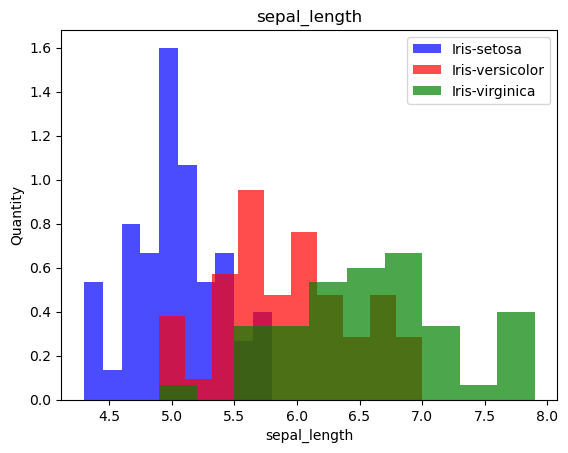

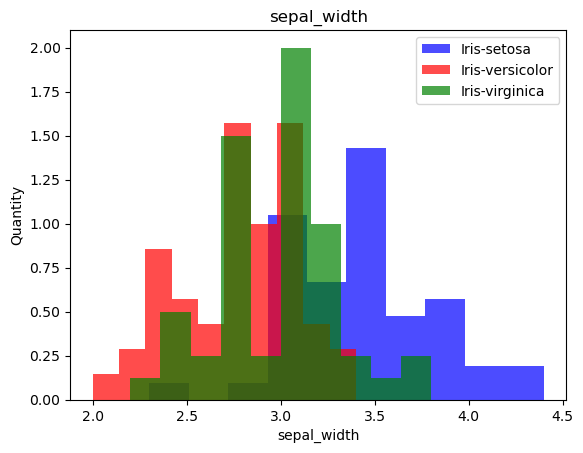

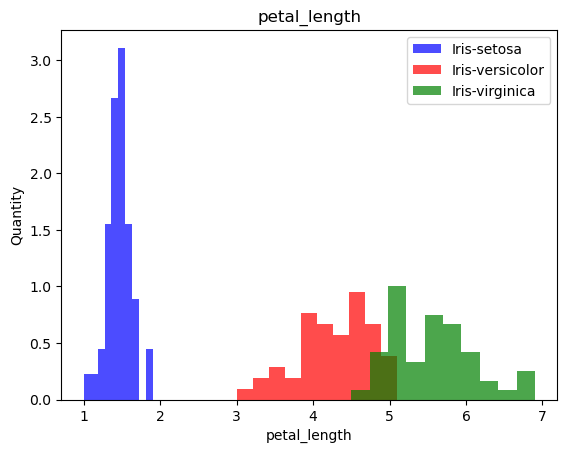

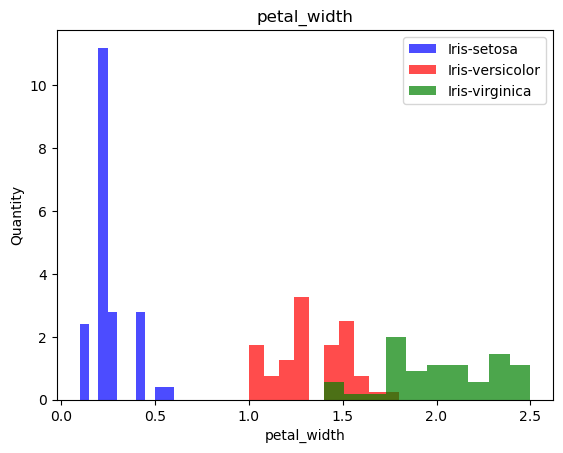

In [6]:
for label in iris.columns[:-1]:
    plt.hist(iris[iris['species']==0][label], color='blue', label='Iris-setosa', alpha=0.7, density=True)
    plt.hist(iris[iris['species']==1][label], color='red', label='Iris-versicolor', alpha=0.7, density=True)
    plt.hist(iris[iris['species']==2][label], color='green', label='Iris-virginica', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Quantity")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [7]:
# Feature Engineering
# Selecting features and target variables
X= iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y= iris['species']

In [8]:
# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [25]:
# Standardizing the features
SScaler= StandardScaler()
X_train = SScaler.fit_transform(X_train)
X_test = SScaler.transform(X_test)

In [26]:
# 1. Decision Tree Model
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
# Predictions
y_pred_dtc = dtc.predict(X_test)

In [28]:
# Evaluate the model
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dtc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtc))
print("Classification Report:\n", classification_report(y_test, y_pred_dtc))

Decision Tree Classifier Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [29]:
# 2. Multinomial Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='multinomial')

In [30]:
# Predictions
y_pred_logreg = log_reg.predict(X_test)

In [31]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [32]:
# 3. Neaural net for classification
import tensorflow as tf

In [33]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Sparse categorical crossentropy')
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    
    plt.show()

In [58]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
 nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(3, activation='softmax')# we use softmax to get 0, 1 and 2 projections     
 ])

 nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])  
 history = nn_model.fit(
 X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
 ) 
 return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


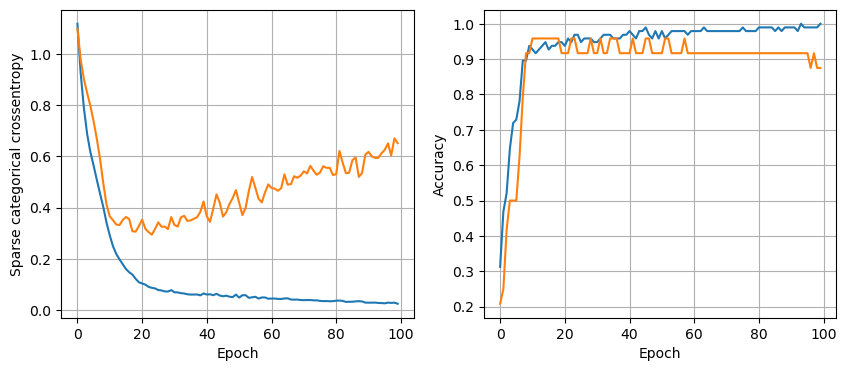

16 nodes, dropout 0, lr 0.01, batch size 64


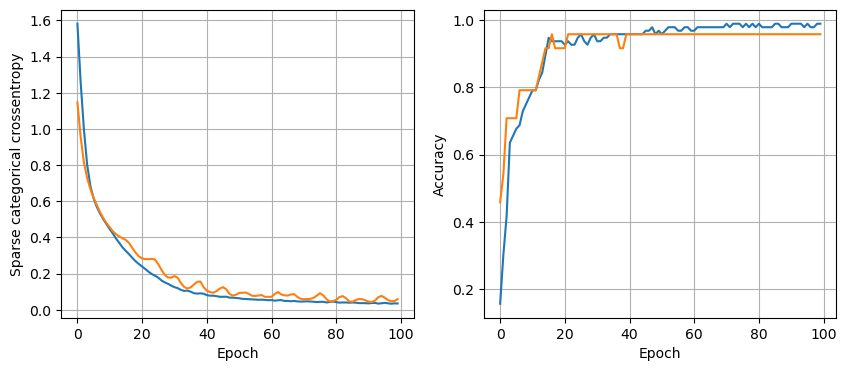

16 nodes, dropout 0, lr 0.01, batch size 128


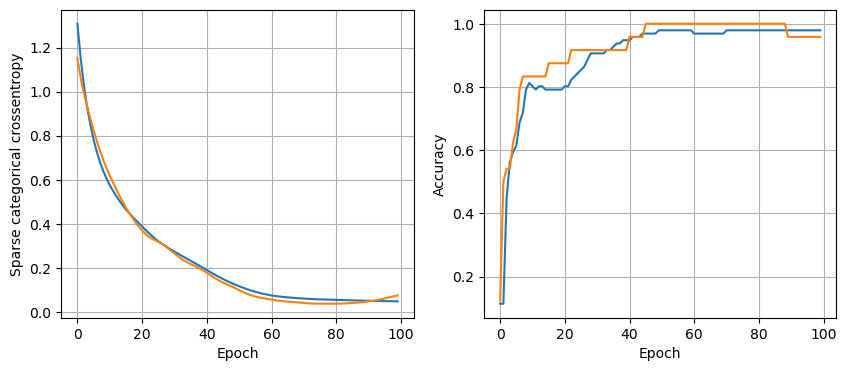

16 nodes, dropout 0, lr 0.005, batch size 32


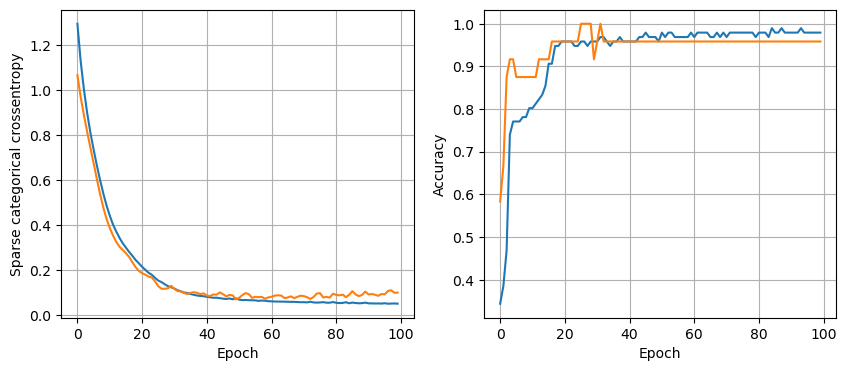

16 nodes, dropout 0, lr 0.005, batch size 64


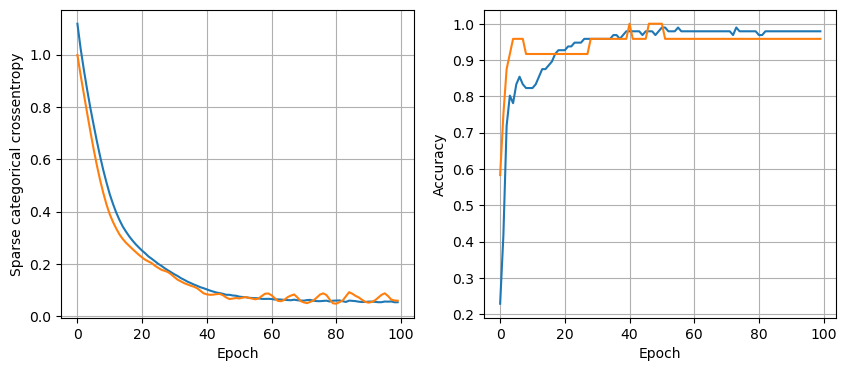

16 nodes, dropout 0, lr 0.005, batch size 128


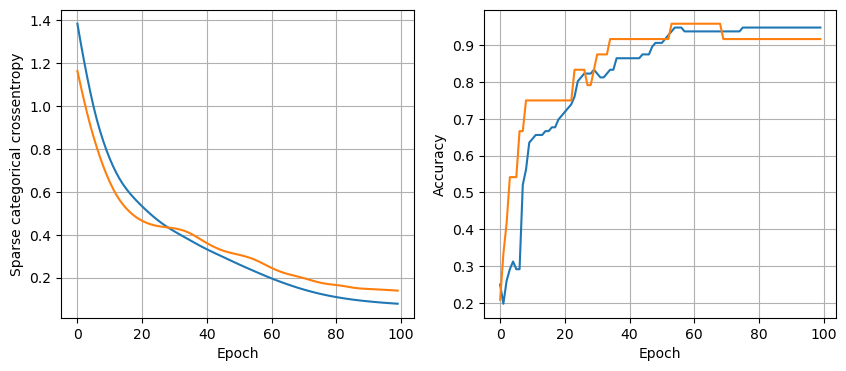

16 nodes, dropout 0, lr 0.001, batch size 32


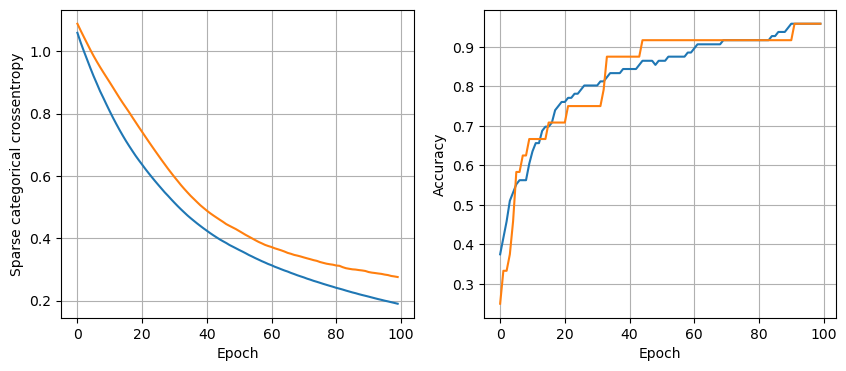

16 nodes, dropout 0, lr 0.001, batch size 64


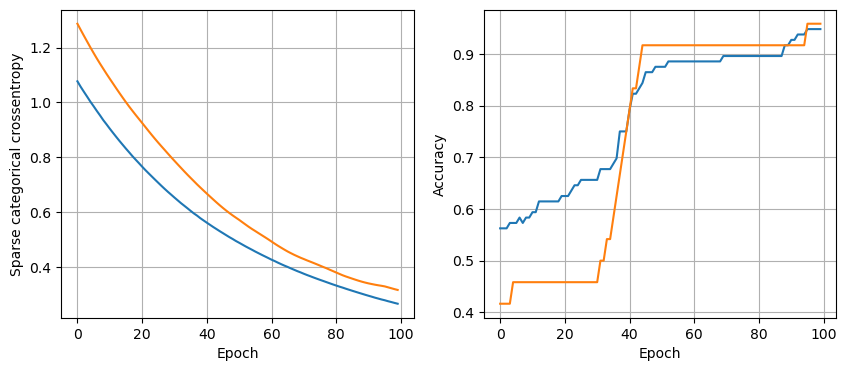

16 nodes, dropout 0, lr 0.001, batch size 128


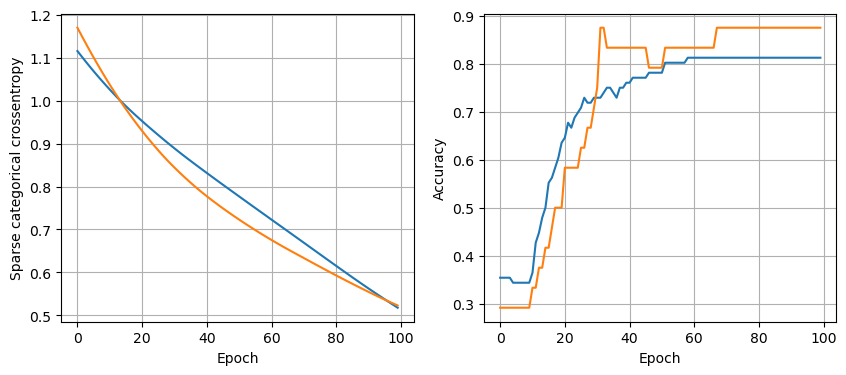

16 nodes, dropout 0.2, lr 0.01, batch size 32


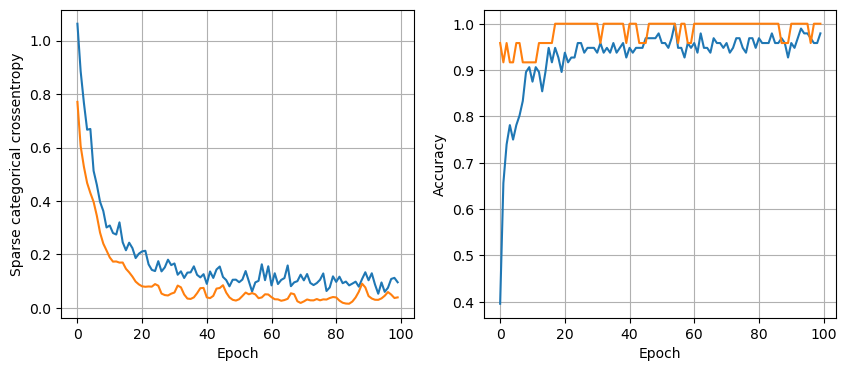

16 nodes, dropout 0.2, lr 0.01, batch size 64


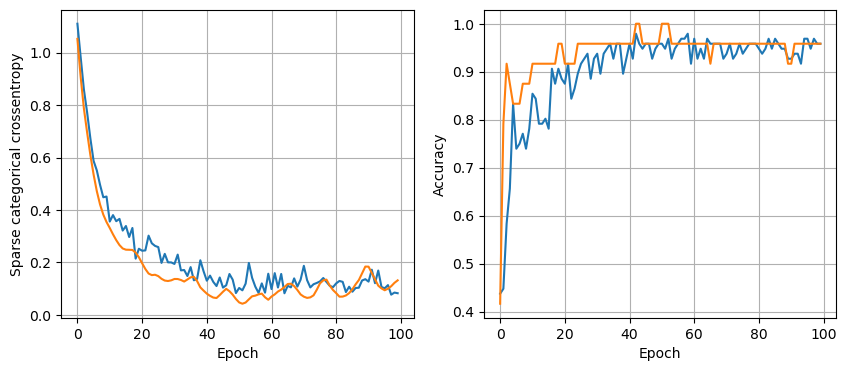

16 nodes, dropout 0.2, lr 0.01, batch size 128


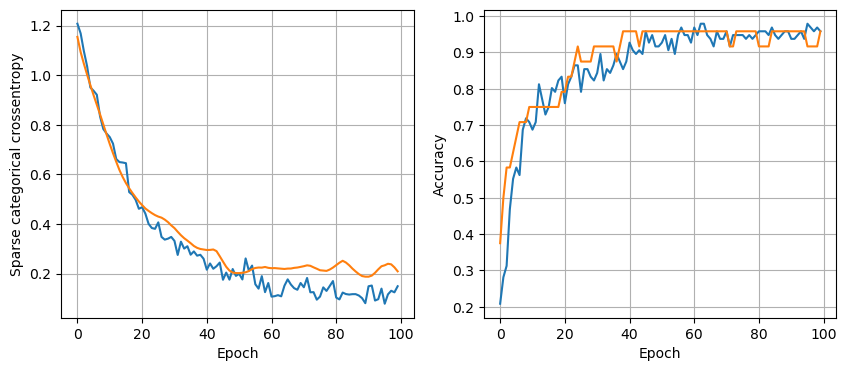

16 nodes, dropout 0.2, lr 0.005, batch size 32


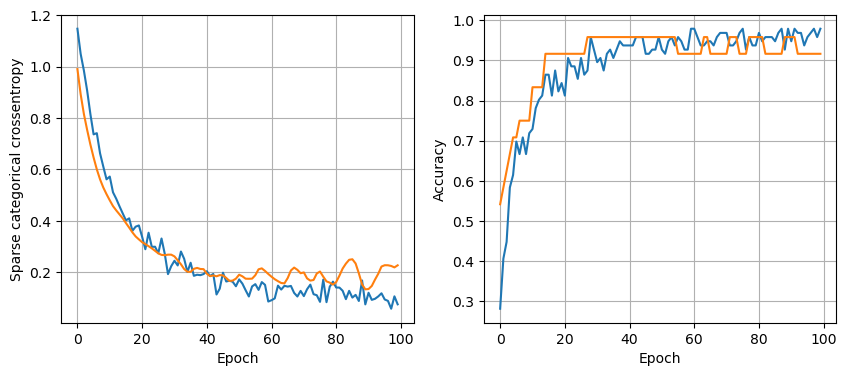

16 nodes, dropout 0.2, lr 0.005, batch size 64


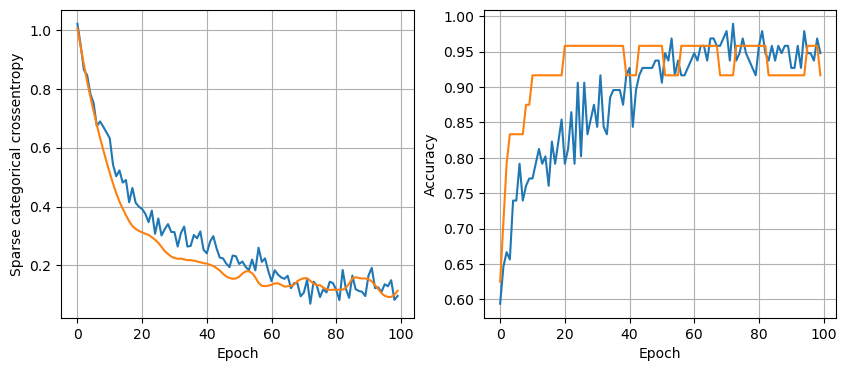

16 nodes, dropout 0.2, lr 0.005, batch size 128


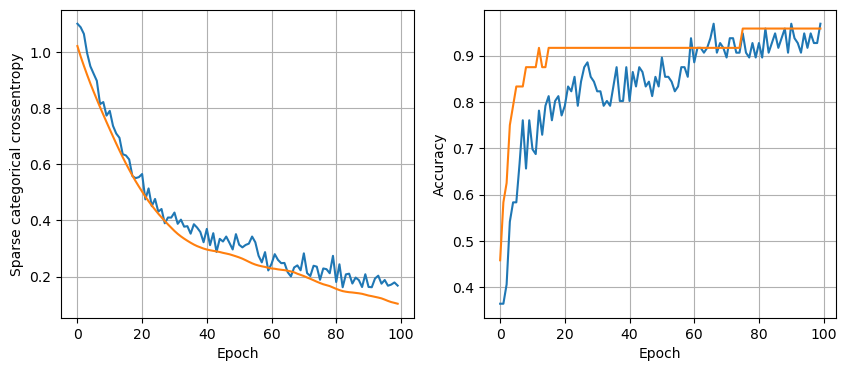

16 nodes, dropout 0.2, lr 0.001, batch size 32


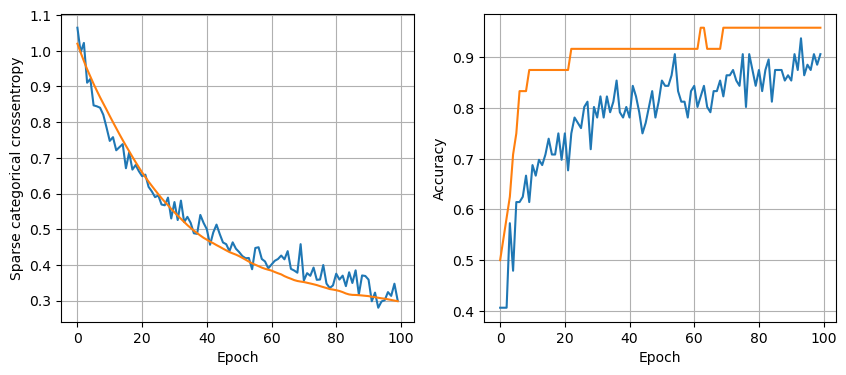

16 nodes, dropout 0.2, lr 0.001, batch size 64


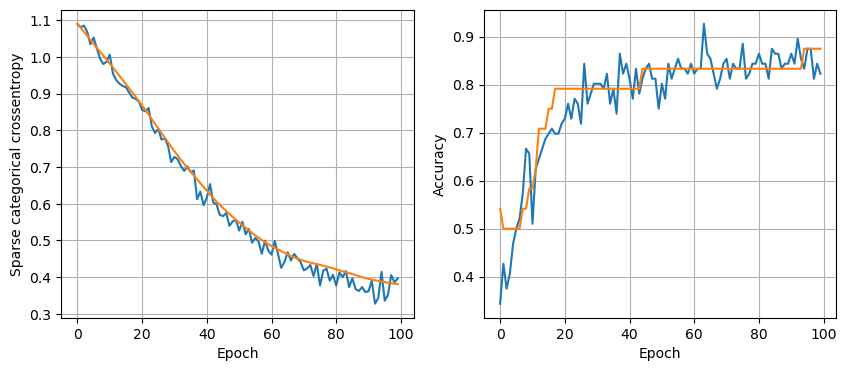

16 nodes, dropout 0.2, lr 0.001, batch size 128


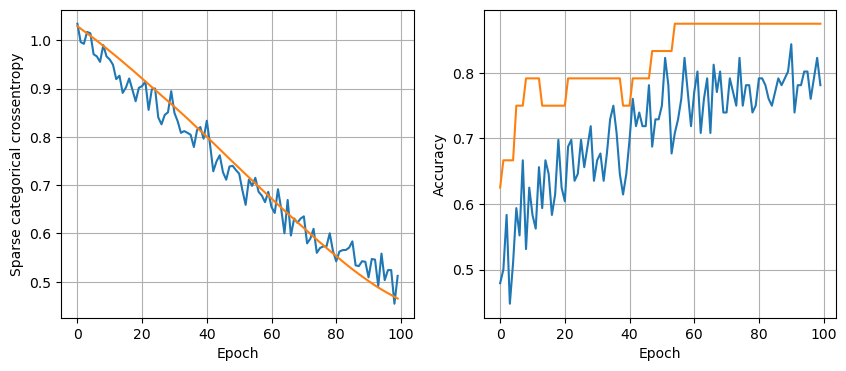

32 nodes, dropout 0, lr 0.01, batch size 32


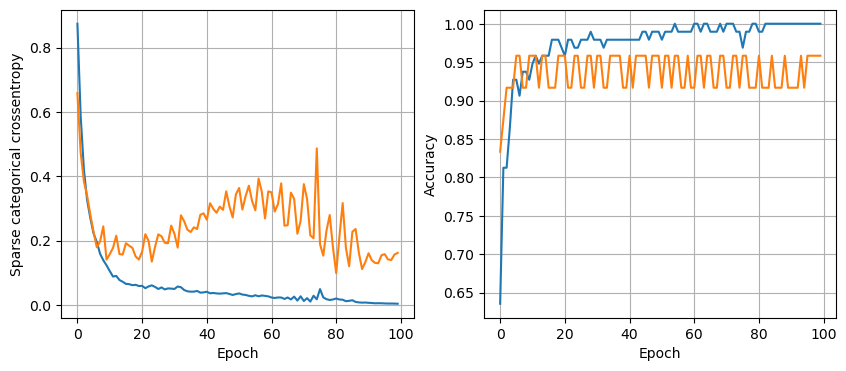

32 nodes, dropout 0, lr 0.01, batch size 64


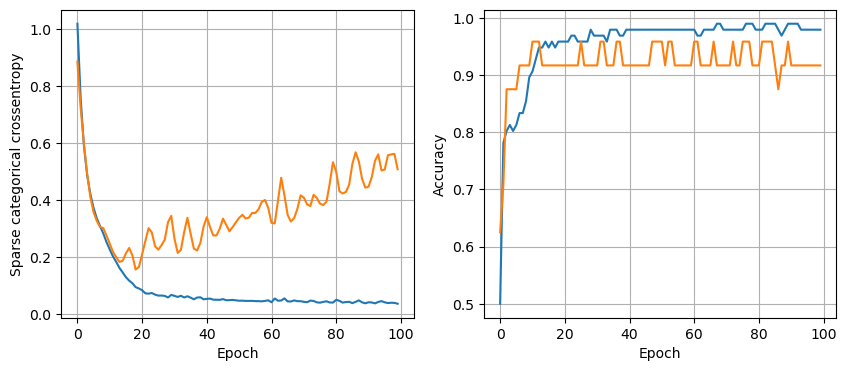

32 nodes, dropout 0, lr 0.01, batch size 128


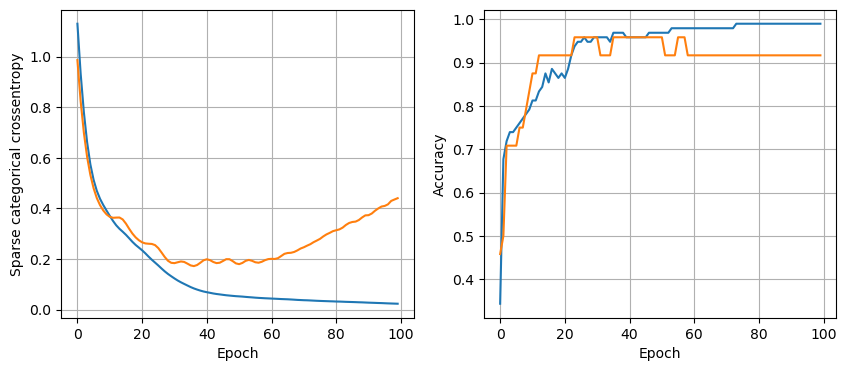

32 nodes, dropout 0, lr 0.005, batch size 32


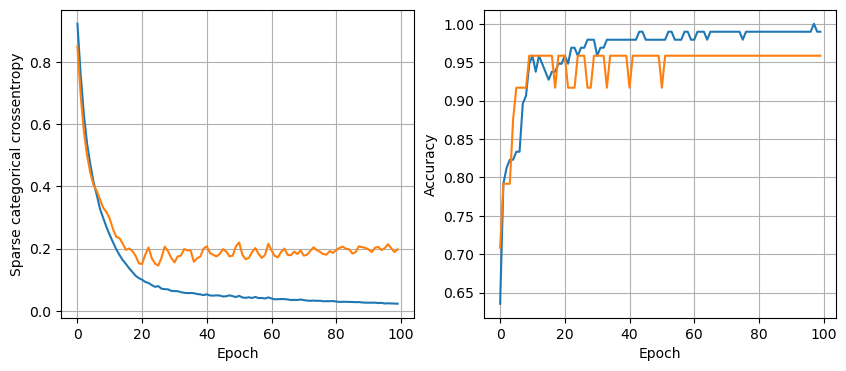

32 nodes, dropout 0, lr 0.005, batch size 64


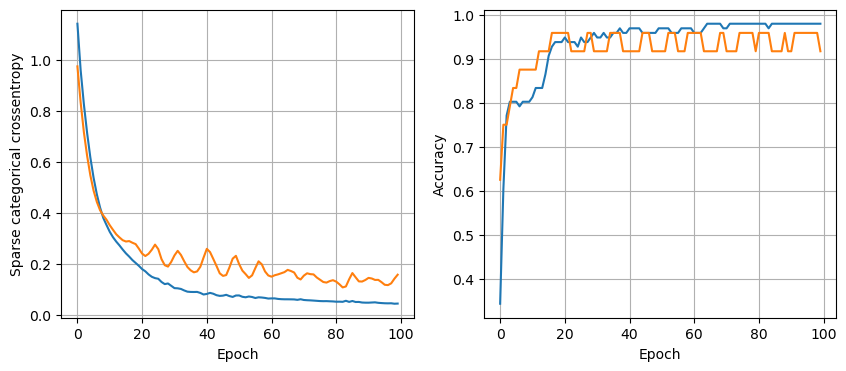

32 nodes, dropout 0, lr 0.005, batch size 128


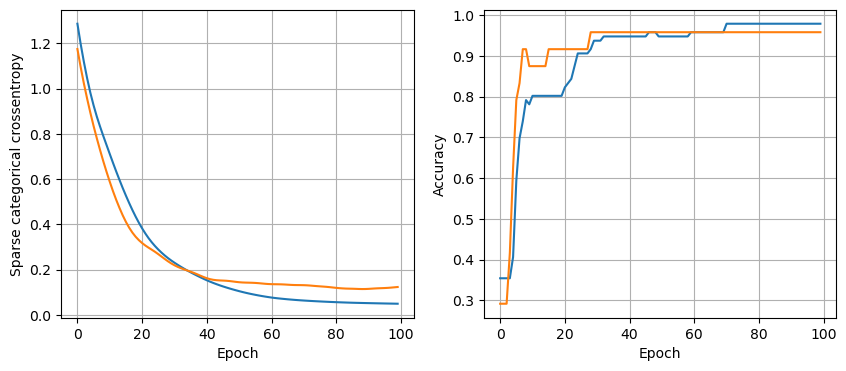

32 nodes, dropout 0, lr 0.001, batch size 32


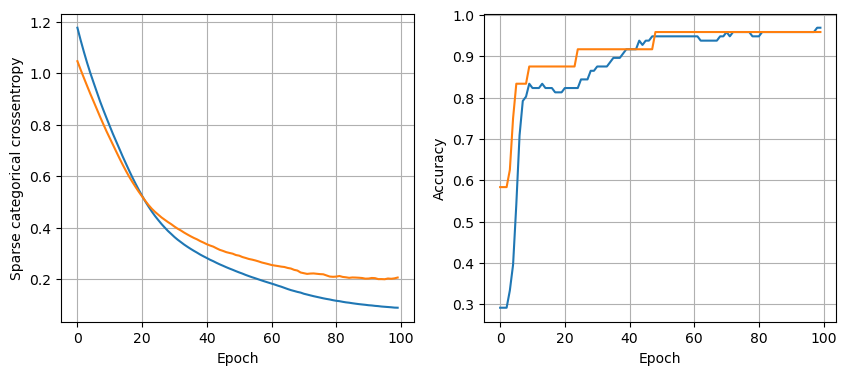

32 nodes, dropout 0, lr 0.001, batch size 64


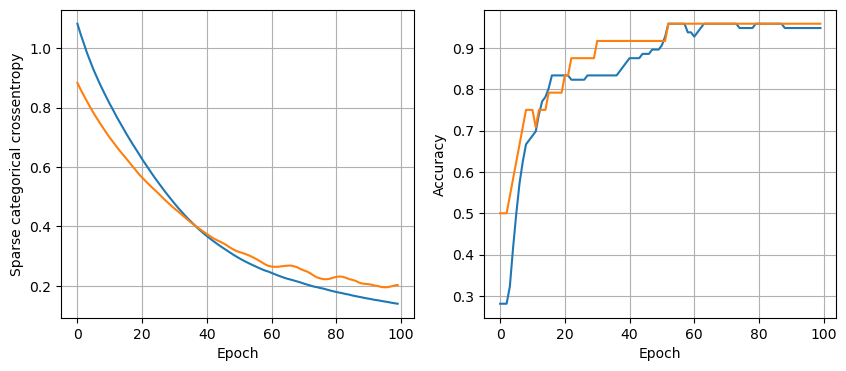

32 nodes, dropout 0, lr 0.001, batch size 128


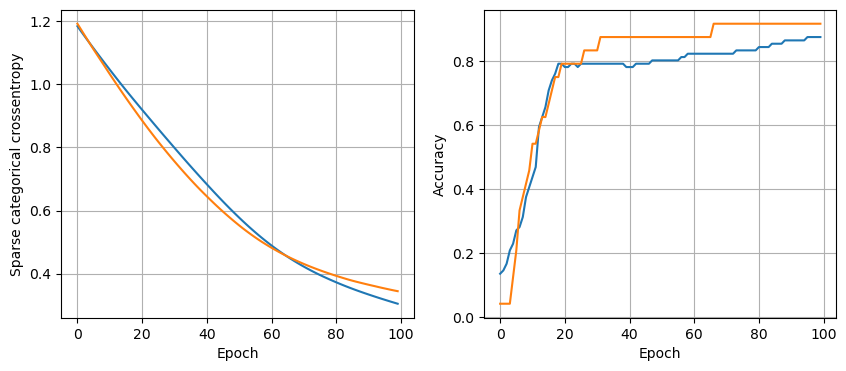

32 nodes, dropout 0.2, lr 0.01, batch size 32


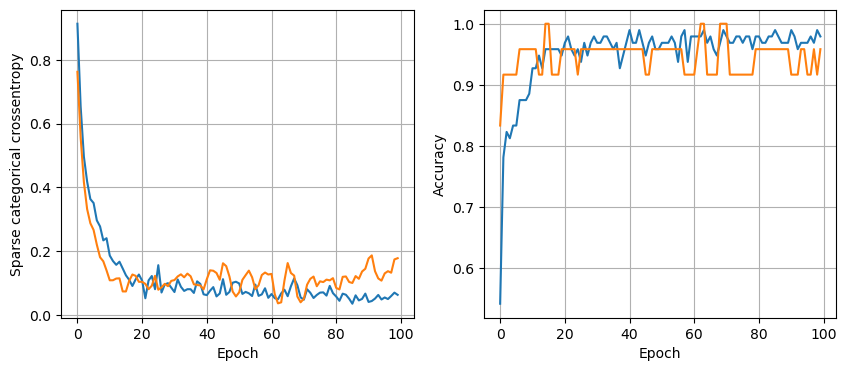

32 nodes, dropout 0.2, lr 0.01, batch size 64


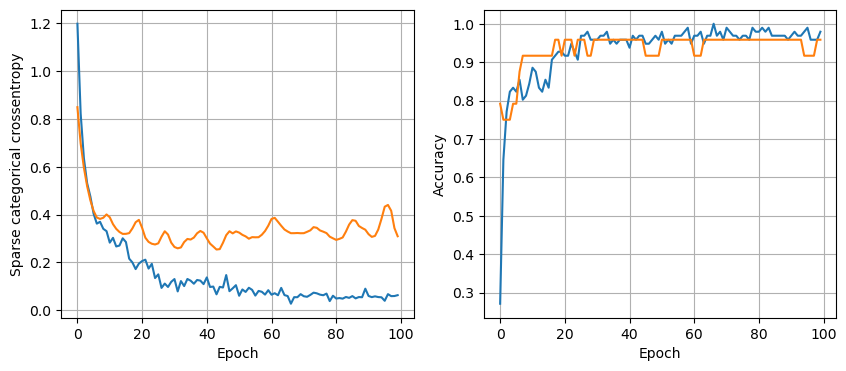

32 nodes, dropout 0.2, lr 0.01, batch size 128


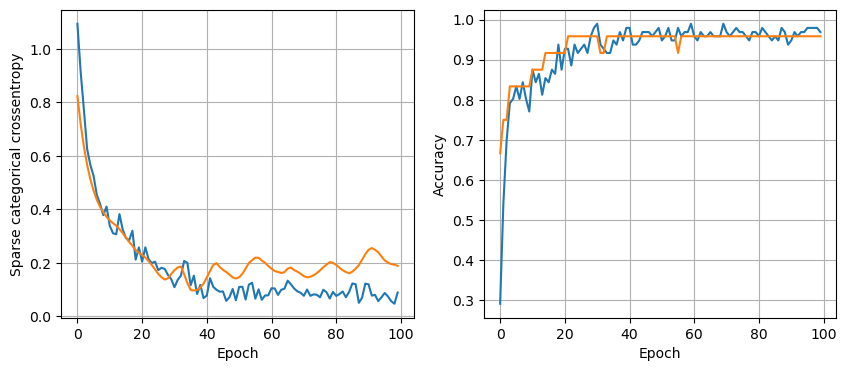

32 nodes, dropout 0.2, lr 0.005, batch size 32


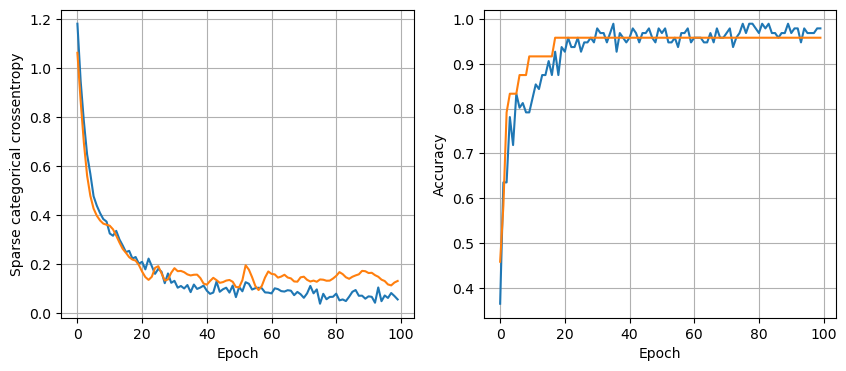

32 nodes, dropout 0.2, lr 0.005, batch size 64


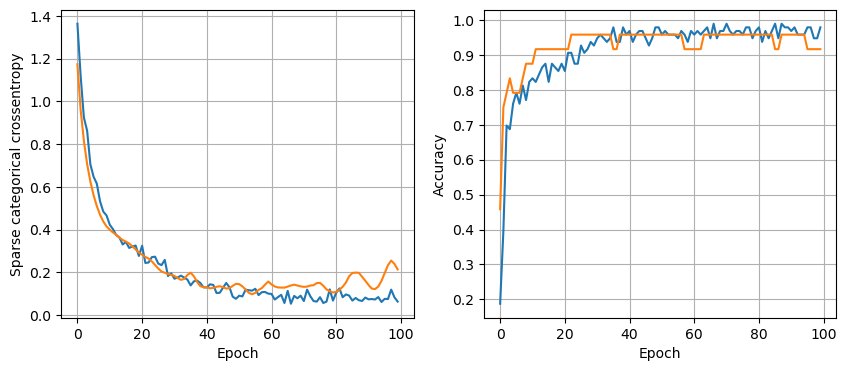

32 nodes, dropout 0.2, lr 0.005, batch size 128


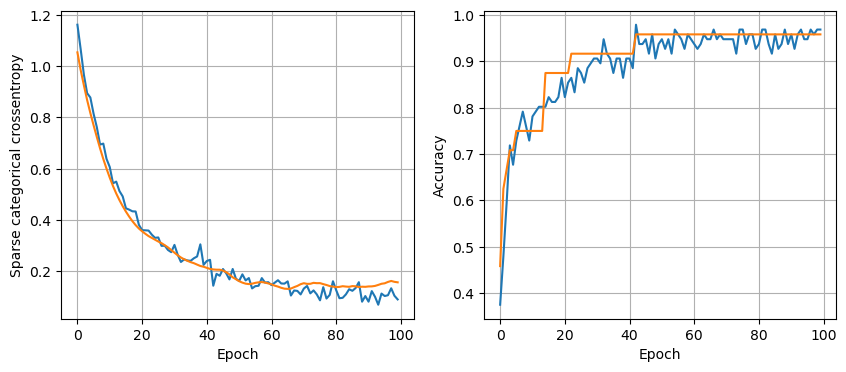

32 nodes, dropout 0.2, lr 0.001, batch size 32


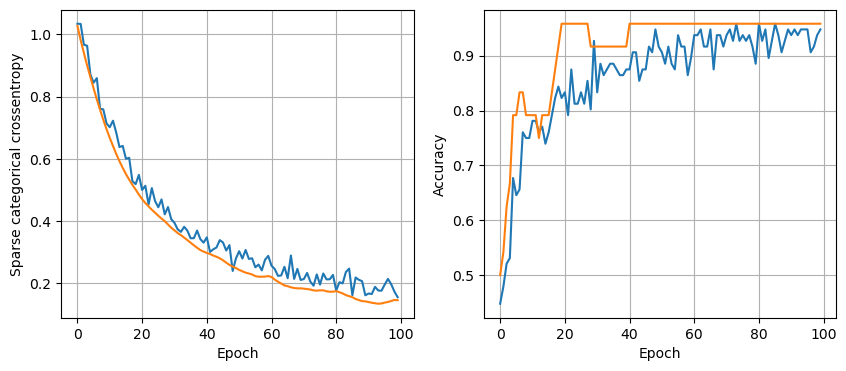

32 nodes, dropout 0.2, lr 0.001, batch size 64


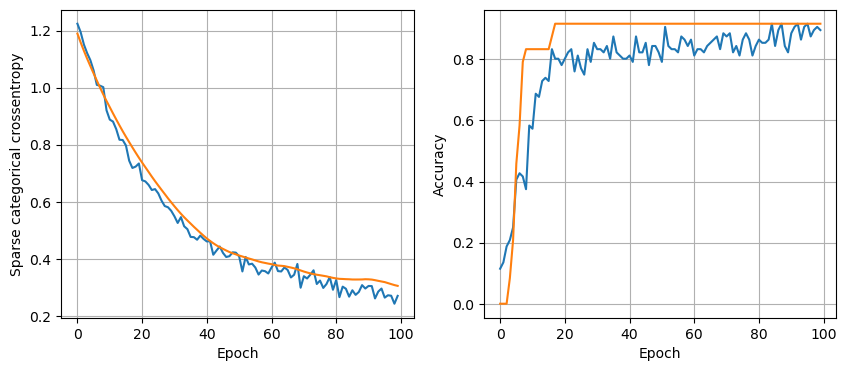

32 nodes, dropout 0.2, lr 0.001, batch size 128


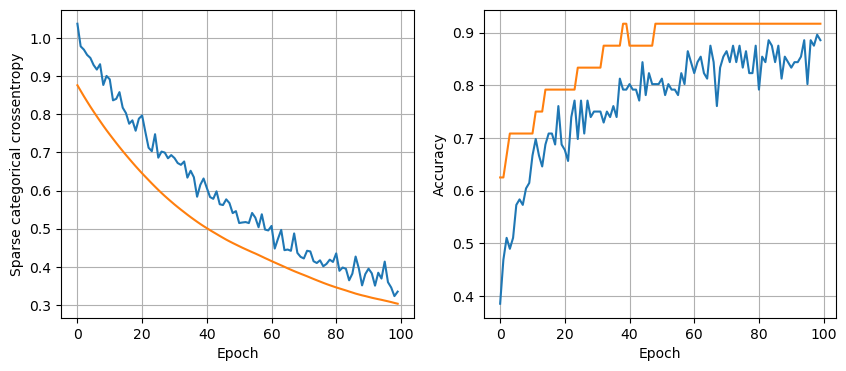

64 nodes, dropout 0, lr 0.01, batch size 32


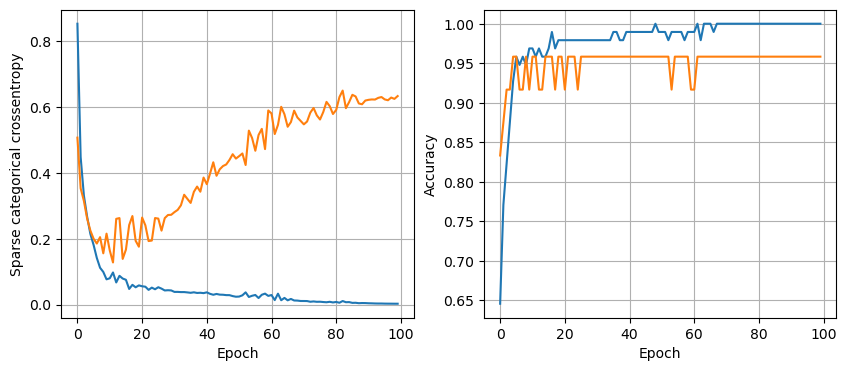

64 nodes, dropout 0, lr 0.01, batch size 64


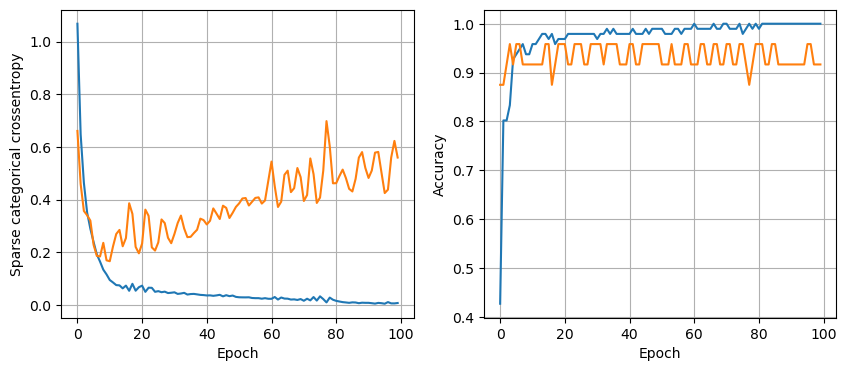

64 nodes, dropout 0, lr 0.01, batch size 128


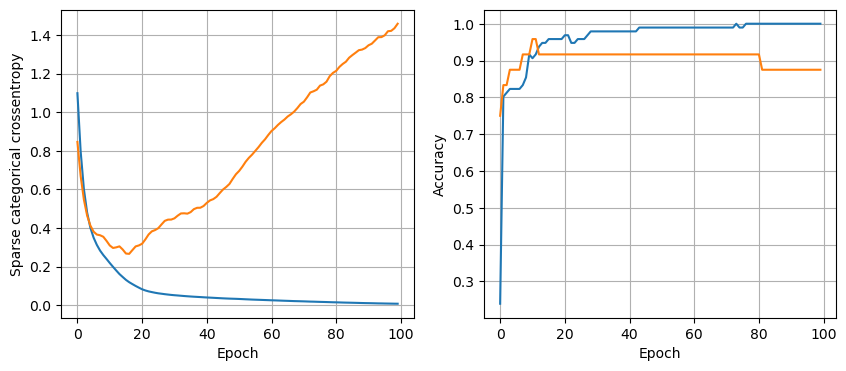

64 nodes, dropout 0, lr 0.005, batch size 32


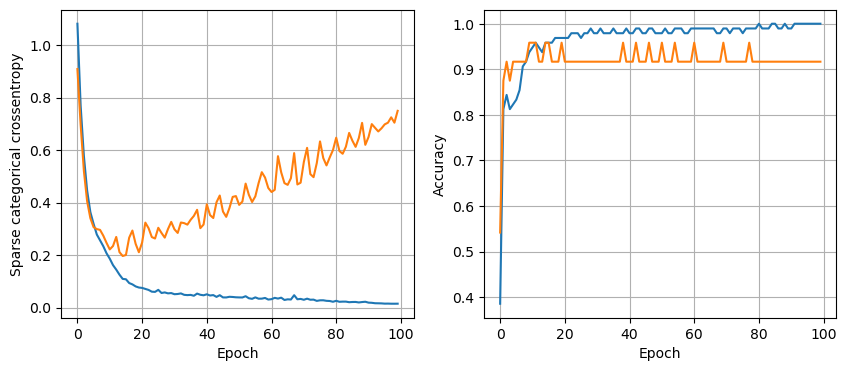

64 nodes, dropout 0, lr 0.005, batch size 64


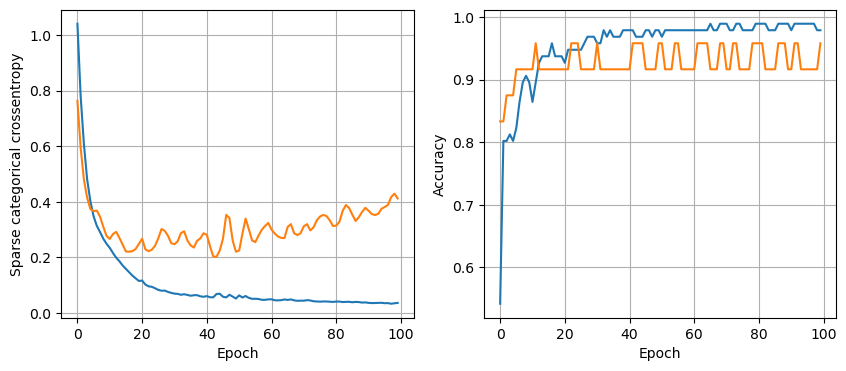

64 nodes, dropout 0, lr 0.005, batch size 128


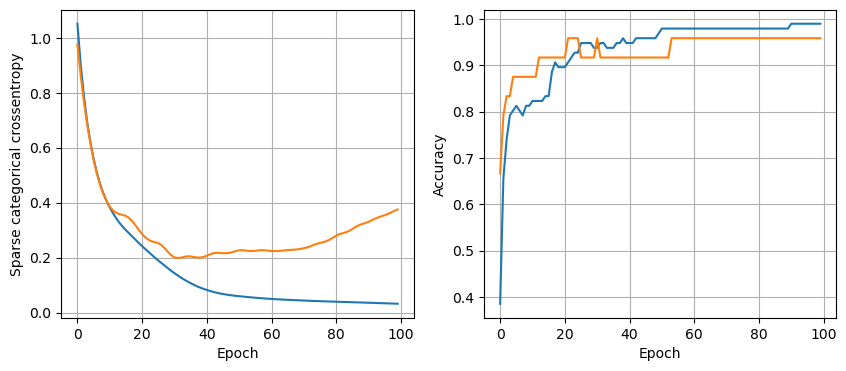

64 nodes, dropout 0, lr 0.001, batch size 32


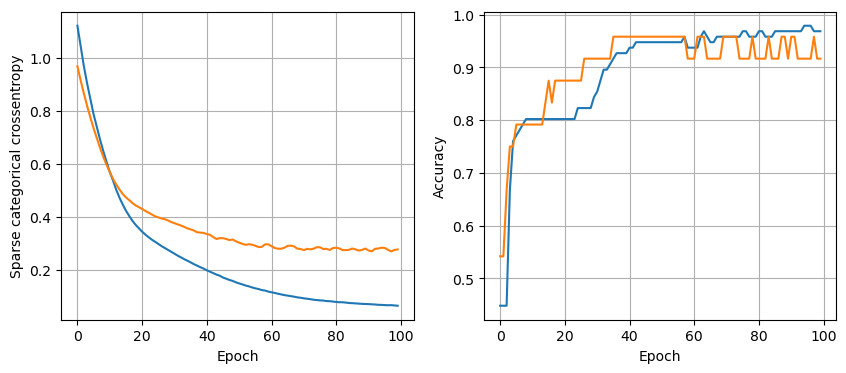

64 nodes, dropout 0, lr 0.001, batch size 64


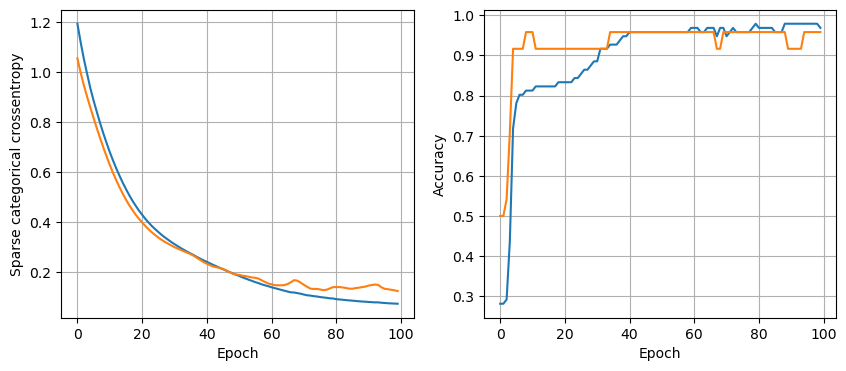

64 nodes, dropout 0, lr 0.001, batch size 128


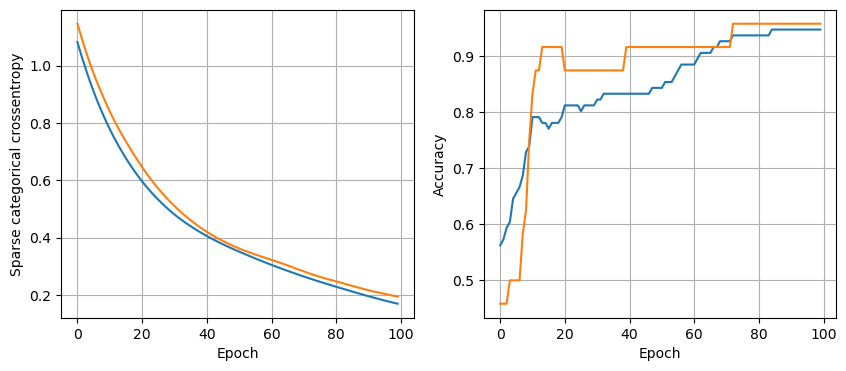

64 nodes, dropout 0.2, lr 0.01, batch size 32


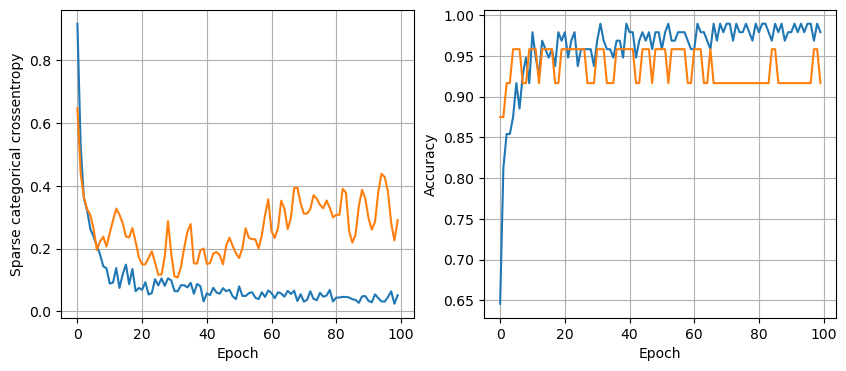

64 nodes, dropout 0.2, lr 0.01, batch size 64


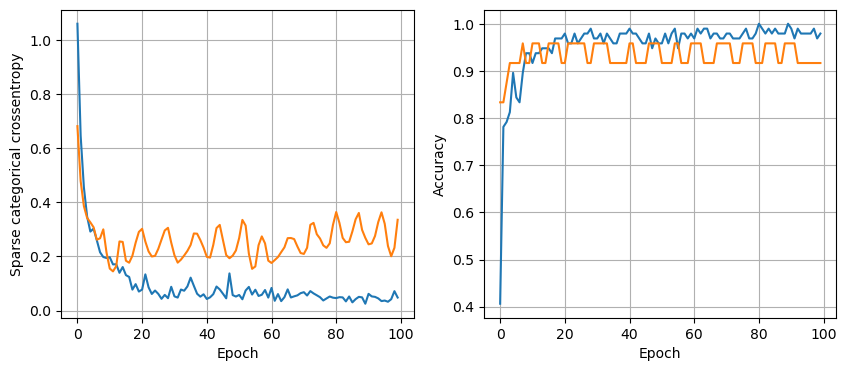

64 nodes, dropout 0.2, lr 0.01, batch size 128


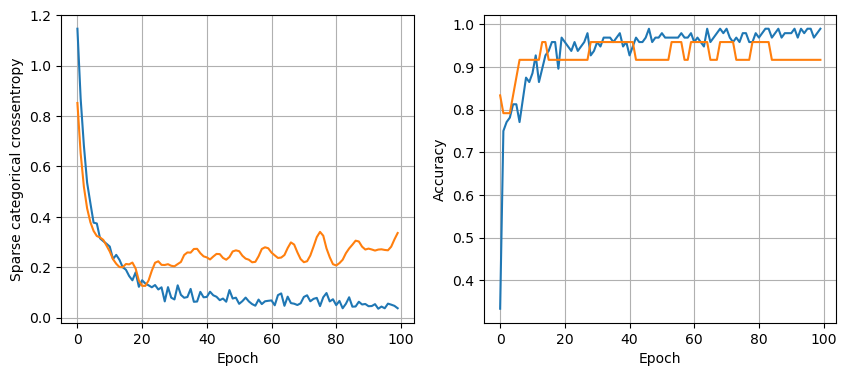

64 nodes, dropout 0.2, lr 0.005, batch size 32


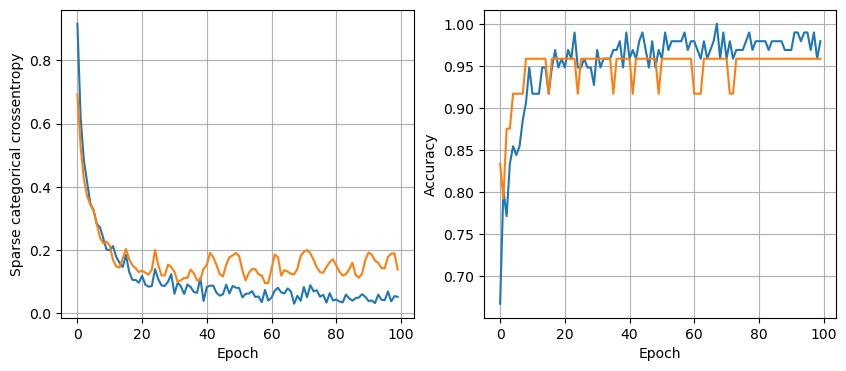

64 nodes, dropout 0.2, lr 0.005, batch size 64


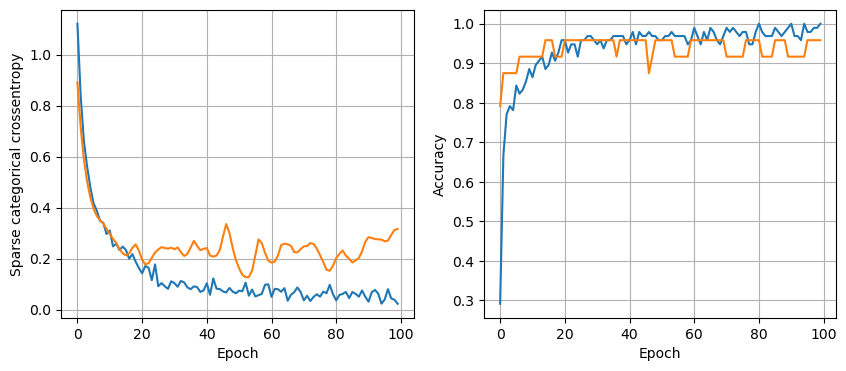

64 nodes, dropout 0.2, lr 0.005, batch size 128


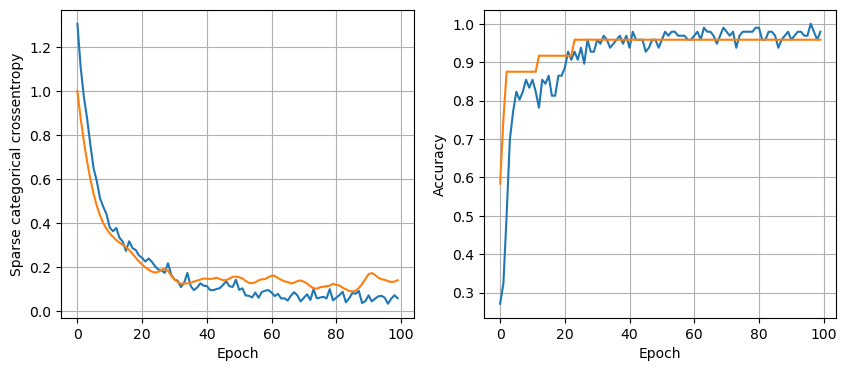

64 nodes, dropout 0.2, lr 0.001, batch size 32


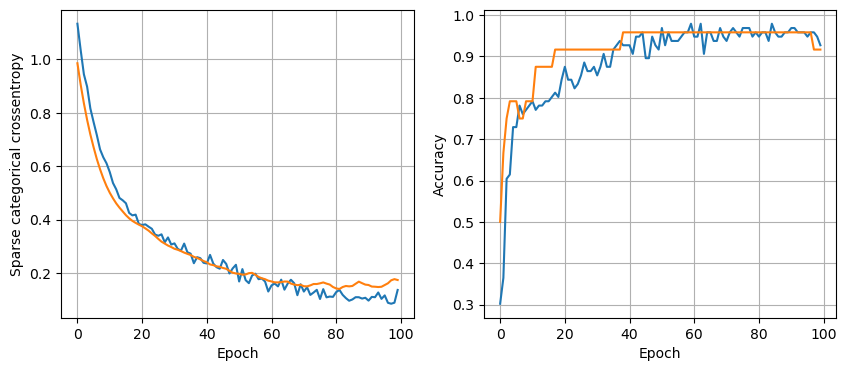

64 nodes, dropout 0.2, lr 0.001, batch size 64


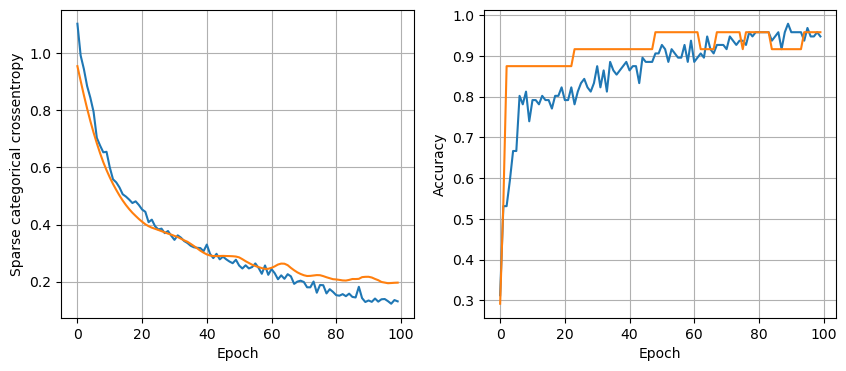

64 nodes, dropout 0.2, lr 0.001, batch size 128


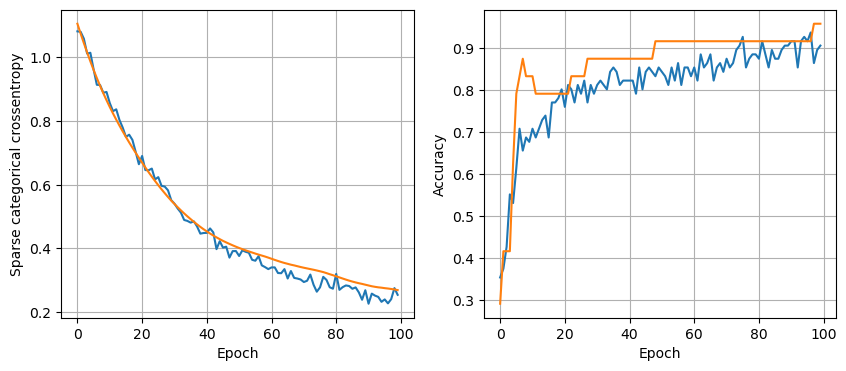

In [59]:
epochs=100
for num_nodes in [16, 32, 64]:
    for dropout_prob in[0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
               
               

In [64]:
# Predictions
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [65]:
# Evaluate the model
print("Neaural Net Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Neaural Net Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

